# Credit Risk

Sebagai tugas akhir dari masa kontrakmu sebagai intern Data Scientist di ID/X Partners, kali ini kamu akan dilibatkan dalam projek dari sebuah lending company. Kamu akan berkolaborasi dengan berbagai departemen lain dalam projek ini untuk menyediakan solusi teknologi bagi company tersebut. Kamu diminta untuk membangun model yang dapat memprediksi credit risk menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak. Selain itu kamu juga perlu mempersiapkan media visual untuk mempresentasikan solusi ke klien. Pastikan media visual yang kamu buat jelas, mudah dibaca, dan komunikatif. Pengerjaan end-to-end solution ini dapat dilakukan di Programming Language pilihanmu dengan tetap mengacu kepada framework/methodology Data Science.

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('C:/Users/Muhammad Hanif/Desktop/Data Science/Internship/idx partner/Dataset/loan_data_2007_2014.csv')
df.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [3]:
list_default = {'Charged Off':'Yes','Late (31-120 days)':'Yes','In Grace Period':'Yes','Late (16-30 days)':'Yes'
                ,'Default':'Yes','Current':'No','Fully Paid':'No'}
df = df.rename(columns = {'loan_status':'default_status'})
df['default_status'] = df['default_status'].replace(list_default)

ketika default status menunjukan selain Fully Paid atau Current akan dianggap default. Untuk kredit yang tidak masuk dalam credit policy akan di drop.

In [4]:
df = df[~(df['default_status']=='Does not meet the credit policy. Status:Fully Paid')]
df = df[~(df['default_status']=='Does not meet the credit policy. Status:Charged Off')]
df['default_status'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:ylabel='funded_amnt'>

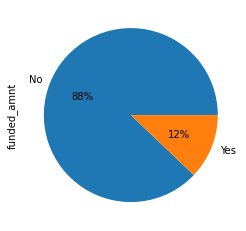

In [5]:
df.groupby('default_status')['funded_amnt'].sum().plot(kind='pie',autopct='%1.0f%%')

In [6]:
df[df['default_status']=='Yes']['funded_amnt'].sum()

804617925

# Data Science Methodology

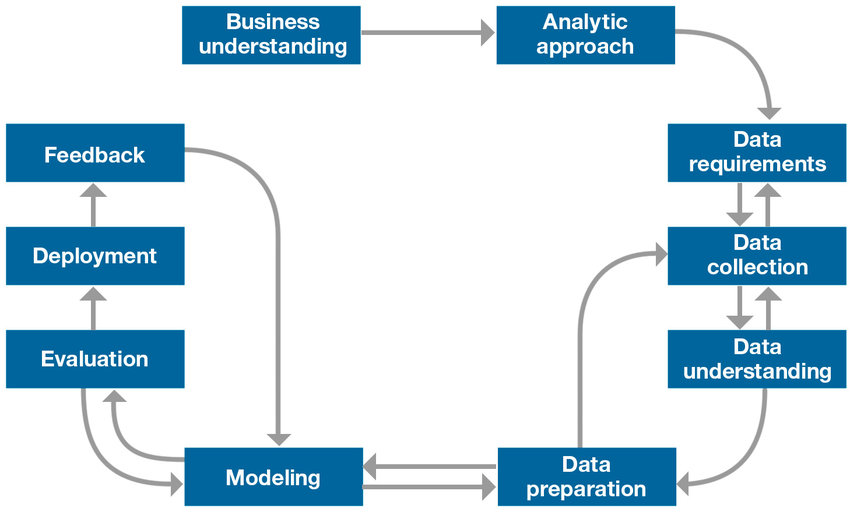

# Business Understanding and Analytic Approach

**Business Problem** 

Perusahaan pinjaman memiliki masalah yaitu banyak peminjam yang gagal bayar. Jumlah kerugian yang dialami perusahaan yaitu **$804.617.925** atau sekitar dari **12% total peminjaman**. Oleh karena itu perusahaan ingin meminimalisir kreditur yang berpotensi gagal bayar dengan memberikan data pinjaman dari tahun sebelumnya

**Business Metric**

Menurunkan jumlah nasabah yang gagal bayar


**Analytic Approach**

**Predictive Analytic** Membuat model yang dapat memprediksi nasabah yang akan gagal bayar

# Data Requirements and Data Colection

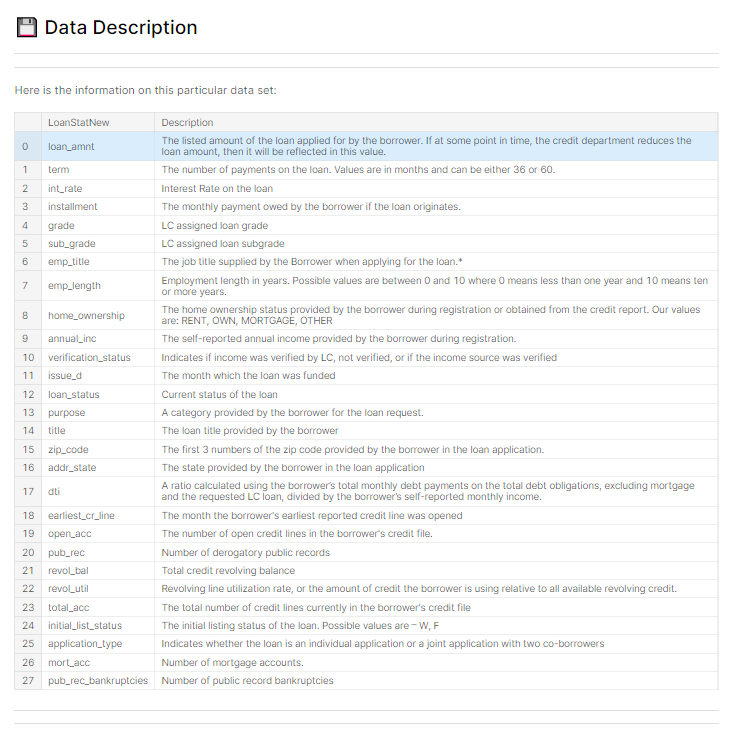

In [7]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Percent of Null','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum().sum()/df[var].count(),df[var].unique()]
    
# Join with the variables dataframe
print(variables.set_index('Variable').sort_values('Percent of Null',ascending=False)[:100])
print('jumlah data duplikat',df.duplicated(keep=False).sum().sum())

                            Number of unique values  Percent of Null  \
Variable                                                               
inq_last_12m                                      0              inf   
verification_status_joint                         0              inf   
open_acc_6m                                       0              inf   
open_il_6m                                        0              inf   
open_il_12m                                       0              inf   
open_il_24m                                       0              inf   
mths_since_rcnt_il                                0              inf   
annual_inc_joint                                  0              inf   
total_bal_il                                      0              inf   
il_util                                           0              inf   
open_rv_12m                                       0              inf   
open_rv_24m                                       0             

jumlah data duplikat 0


variabel yang tidak memiliki nilai lebih baik didrop, yang memiliki nilai tanggal, hanya memiliki satu nilai, nilai kategori yang memiliki banyak nilai unik dapat didrop

In [8]:
null_column = ['inq_last_12m','total_bal_il','dti_joint','verification_status_joint','annual_inc_joint','open_acc_6m'
               ,'open_il_6m','open_il_6m','mths_since_rcnt_il','il_util','open_rv_24m','total_cu_tl','inq_fi','max_bal_bc',
              'all_util','open_rv_12m','open_il_24m','open_il_12m','next_pymnt_d','desc','policy_code','application_type'
               ,'url','zip_code','sub_grade','issue_d','Unnamed: 0','id','member_id','emp_title','title','last_pymnt_d',
               'last_credit_pull_d','earliest_cr_line']
df.drop(null_column,axis=1,inplace=True)
variables = pd.DataFrame(columns=['Variable','Number of unique values','Percent of Null','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum().sum()/df[var].count(),df[var].unique()]
    
# Join with the variables dataframe
variables.set_index('Variable').sort_values('Percent of Null',ascending=False)

,Number of unique values,Percent of Null,Values
Variable,,,
mths_since_last_record,123,6.503254,"[nan, 113.0, 105.0, 97.0, 33.0, 93.0, 52.0, 85..."
mths_since_last_major_derog,162,3.683412,"[nan, 53.0, 34.0, 54.0, 69.0, 7.0, 16.0, 71.0,..."
mths_since_last_delinq,145,1.162176,"[nan, 35.0, 38.0, 61.0, 8.0, 20.0, 18.0, 68.0,..."
total_rev_hi_lim,14612,0.170519,"[nan, 59900.0, 15100.0, 61100.0, 8100.0, 15400..."
tot_cur_bal,220690,0.170519,"[nan, 114834.0, 14123.0, 267646.0, 13605.0, 27..."
tot_coll_amt,6321,0.170519,"[nan, 0.0, 15386.0, 1514.0, 154.0, 539.0, 92.0..."
emp_length,11,0.047392,"[10+ years, < 1 year, 1 year, 3 years, 8 years..."
revol_util,1261,0.000648,"[83.7, 9.4, 98.5, 21.0, 53.9, 28.3, 85.6, 87.5..."
collections_12_mths_ex_med,9,0.000121,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 6.0, 16.0, 20.0..."


In [9]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,4.635360e+05,463536.000000,463536.000000,463536.000000,214384.000000,61778.000000,463536.000000,463536.000000,4.635360e+05,463236.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463480.000000,98974.000000,463536.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,14348.575569,14324.151792,14269.645970,13.827334,432.891377,7.328839e+04,17.236823,0.284947,0.784893,34.155819,74.994254,11.193599,0.160907,1.616391e+04,56.196013,25.078755,4436.216215,4434.596582,11556.054460,11499.392731,8876.641437,2593.879235,0.634009,84.899781,8.814082,3132.593644,0.009137,42.852547,0.004017,1.919135e+02,1.388017e+05,3.037909e+04
std,8287.139007,8274.892198,8287.276824,4.365371,243.447747,5.487171e+04,7.850529,0.797648,1.037236,21.750389,29.608940,4.982497,0.511679,2.018872e+04,23.700628,11.582457,6364.787304,6362.904924,8268.594552,8252.331891,7036.206046,2486.906162,5.190799,548.438200,83.275906,5564.281609,0.108958,21.662591,0.068775,1.463021e+04,1.521147e+05,3.724713e+04
min,500.000000,500.000000,0.000000,5.420000,15.690000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,257.430000,4.500000e+04,11.380000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.434000e+03,39.300000,17.000000,0.000000,0.000000,5564.780000,5525.077500,3718.150000,960.105000,0.000000,0.000000,0.000000,313.360000,0.000000,26.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,381.040000,6.300000e+04,16.880000,0.000000,0.000000,31.000000,77.000000,10.000000,0.000000,1.177900e+04,57.600000,23.000000,553.835000,553.565000,9432.136615,9384.090000,6828.560000,1822.900000,0.000000,0.000000,0.000000,546.695000,0.000000,42.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19975.000000,16.490000,567.342500,8.900000e+04,22.800000,0.000000,1.000000,50.000000,102.000000,14.000000,0.000000,2.032900e+04,74.700000,32.000000,7398.632500,7395.970000,15321.412500,15250.742500,12000.000000,3310.425000,0.000000,0.000000,0.000000,3209.192500,0.000000,59.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,8.000000,188.000000,129.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,188.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


## Mengatasi Missing Value
Nilai NaN yang ada di fitur masih dibawah **20%** sehingga bisa dilakukan imputasi

### Distribusi Data yang Missing Value

In [10]:
num_list = ['mths_since_last_record','mths_since_last_major_derog',
            'mths_since_last_delinq','total_rev_hi_lim','tot_cur_bal',
           'tot_coll_amt','revol_util'
            ,'collections_12_mths_ex_med']

In [11]:
nan_column = ((df[num_list].apply(lambda x: x.isna(), axis=0))>1)

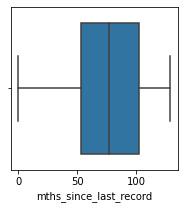

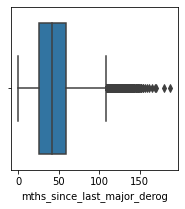

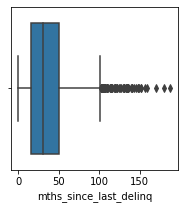

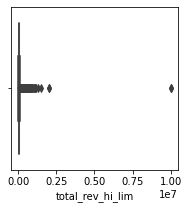

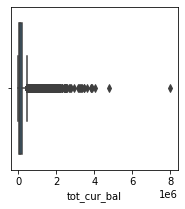

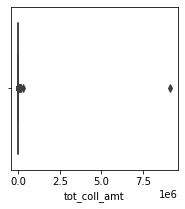

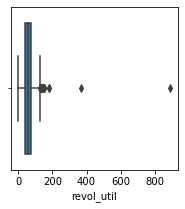

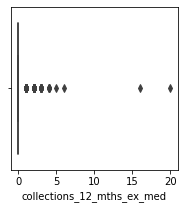

In [12]:
#box plot
for j in range (0,len(num_list)):
    num = num_list[j]
    plt.figure(figsize=(3,3))
    sns.boxplot(df[num])

data banyak yang memiliki outlier

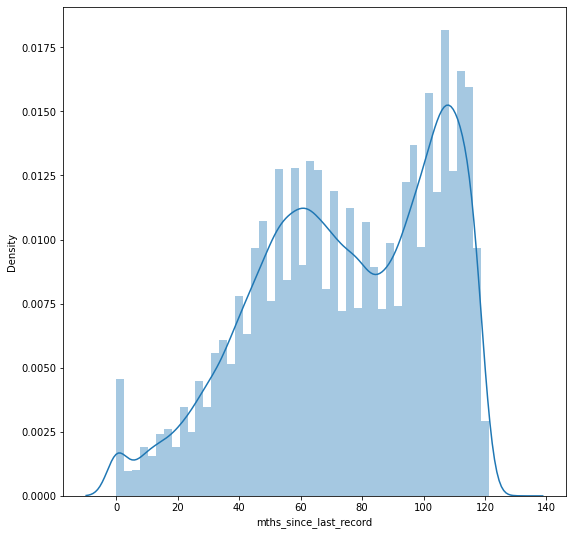

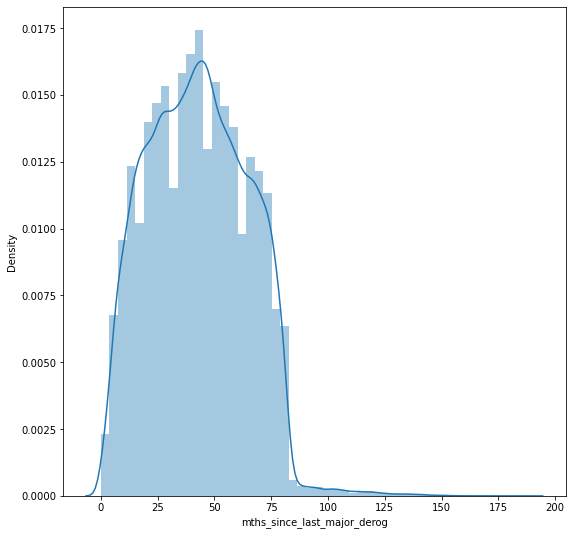

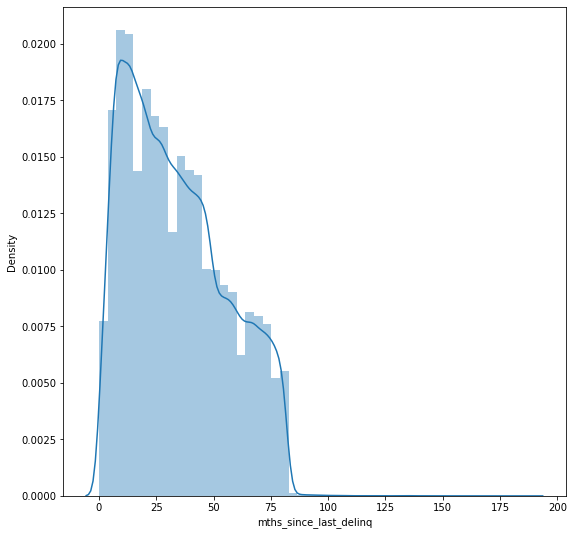

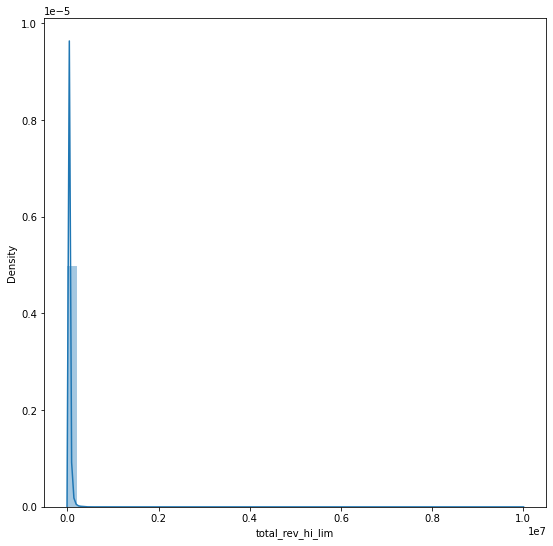

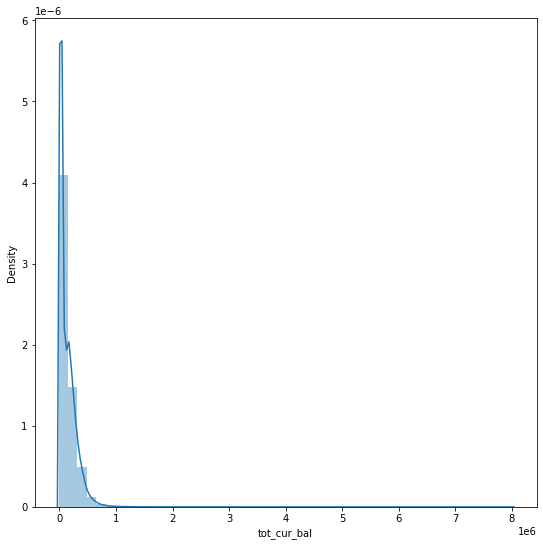

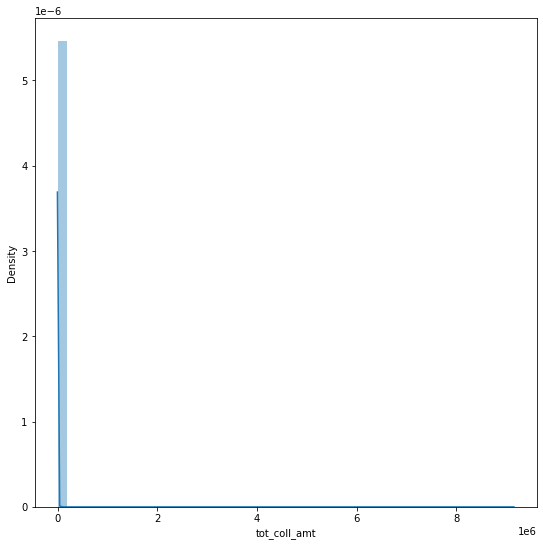

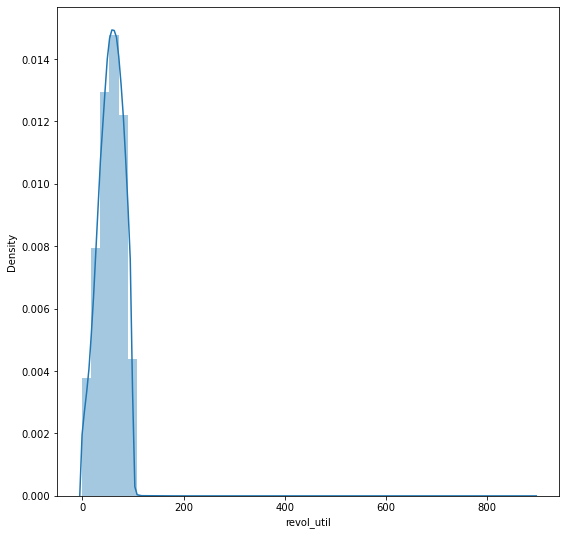

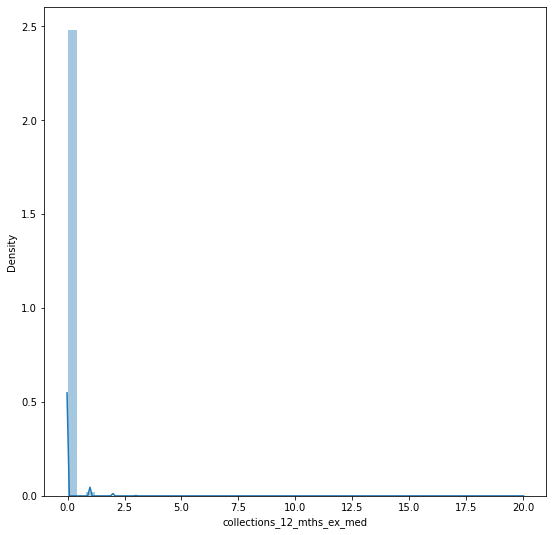

In [13]:
#box plot
for j in range (0,len(num_list)):
    num = num_list[j]
    plt.figure(figsize=(9,9))
    sns.distplot(df[num])

data memiliki distribusi dengan rata-rata skewness cukup tinggi. Imputasi yang cocok untuk jenis data ini adalah median.

In [14]:
df = df.fillna(df.median(numeric_only=True))

In [15]:
df.isna().sum()>1

loan_amnt                      False
funded_amnt                    False
funded_amnt_inv                False
term                           False
int_rate                       False
installment                    False
grade                          False
emp_length                      True
home_ownership                 False
annual_inc                     False
verification_status            False
default_status                 False
pymnt_plan                     False
purpose                        False
addr_state                     False
dti                            False
delinq_2yrs                    False
inq_last_6mths                 False
mths_since_last_delinq         False
mths_since_last_record         False
open_acc                       False
pub_rec                        False
revol_bal                      False
revol_util                     False
total_acc                      False
initial_list_status            False
out_prncp                      False
o

masih ada data yang NaN karena data tersebut string

<AxesSubplot:xlabel='emp_length'>

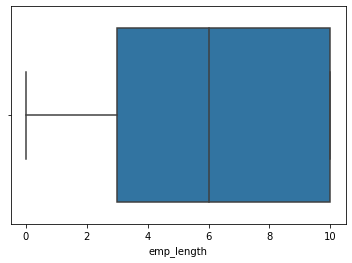

In [16]:
list_length = {'10+ years':10,'9 years':9,'8 years':8,'7 years':7,'6 years':6,'5 years':5,'4 years':4,'3 years':3,'2 years':2,'1 year':1,'< 1 year':0}
list_length
df['emp_length'] = df['emp_length'].replace(list_length)
sns.boxplot(df['emp_length'])

<AxesSubplot:xlabel='emp_length', ylabel='Density'>

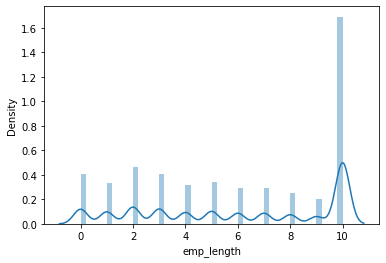

In [17]:
sns.distplot(df['emp_length'])

data tergolong kategorikal sehingga imputasi yang cocok adalah modus

In [18]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode)

In [19]:
df.isna().sum()>1

loan_amnt                      False
funded_amnt                    False
funded_amnt_inv                False
term                           False
int_rate                       False
installment                    False
grade                          False
emp_length                     False
home_ownership                 False
annual_inc                     False
verification_status            False
default_status                 False
pymnt_plan                     False
purpose                        False
addr_state                     False
dti                            False
delinq_2yrs                    False
inq_last_6mths                 False
mths_since_last_delinq         False
mths_since_last_record         False
open_acc                       False
pub_rec                        False
revol_bal                      False
revol_util                     False
total_acc                      False
initial_list_status            False
out_prncp                      False
o

Data sudah tidak ada lagi yang null

# Data Understanding

## Descriptive Analysis

In [20]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,4.635360e+05,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,4.635360e+05,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,4.635360e+05,4.635360e+05,4.635360e+05
mean,14348.575569,14324.151792,14269.645970,13.827334,432.891377,7.328839e+04,17.236823,0.284947,0.784893,32.459557,76.732683,11.193599,0.160907,1.616391e+04,56.196922,25.078755,4436.216215,4434.596582,11556.054460,11499.392731,8876.641437,2593.879235,0.634009,84.899781,8.814082,3132.593644,0.009136,42.182035,0.004017,1.639559e+02,1.304598e+05,2.927498e+04
std,8287.139007,8274.892198,8287.276824,4.365371,243.447747,5.487171e+04,7.850529,0.797648,1.037236,14.875250,10.830711,4.982497,0.511679,2.018872e+04,23.692984,11.582457,6364.787304,6362.904924,8268.594552,8252.331891,7036.206046,2486.906162,5.190799,548.438200,83.275906,5564.281609,0.108951,10.015944,0.068775,1.352281e+04,1.420427e+05,3.453102e+04
min,500.000000,500.000000,0.000000,5.420000,15.690000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,257.430000,4.500000e+04,11.380000,0.000000,0.000000,31.000000,77.000000,8.000000,0.000000,6.434000e+03,39.300000,17.000000,0.000000,0.000000,5564.780000,5525.077500,3718.150000,960.105000,0.000000,0.000000,0.000000,313.360000,0.000000,42.000000,0.000000,0.000000e+00,3.341200e+04,1.500000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,381.040000,6.300000e+04,16.880000,0.000000,0.000000,31.000000,77.000000,10.000000,0.000000,1.177900e+04,57.600000,23.000000,553.835000,553.565000,9432.136615,9384.090000,6828.560000,1822.900000,0.000000,0.000000,0.000000,546.695000,0.000000,42.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19975.000000,16.490000,567.342500,8.900000e+04,22.800000,0.000000,1.000000,31.000000,77.000000,14.000000,0.000000,2.032900e+04,74.700000,32.000000,7398.632500,7395.970000,15321.412500,15250.742500,12000.000000,3310.425000,0.000000,0.000000,0.000000,3209.192500,0.000000,42.000000,0.000000,0.000000e+00,1.857870e+05,3.440000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,8.000000,188.000000,129.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,188.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [21]:
numeric = df.describe().columns.tolist()

In [22]:
numeric

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

**Business Insight** :

    1. total data yang akan dipakai yaitu 463.536 data
    2. rata-rata loan_amnt dan funded_amnt hampir sama. Hal ini menyatakan bahwa hampir seluruh pengajuan pinjaman diterima 100%. 

## Univariat Analysis

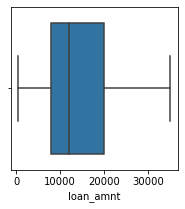

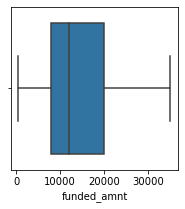

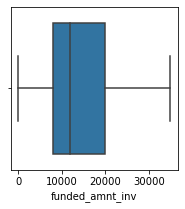

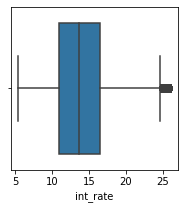

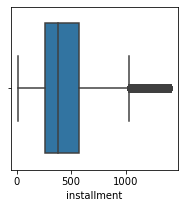

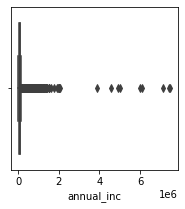

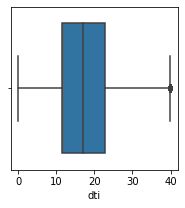

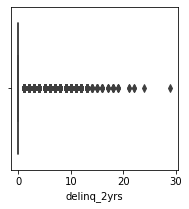

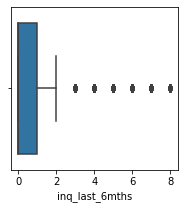

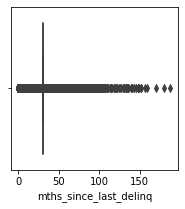

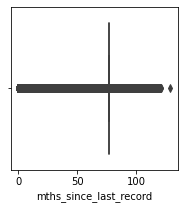

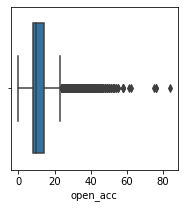

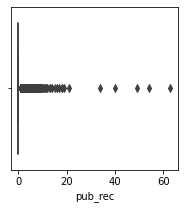

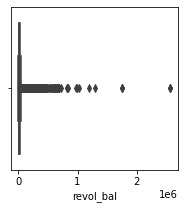

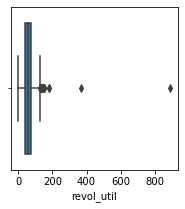

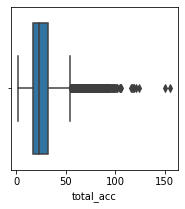

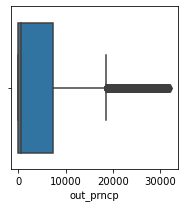

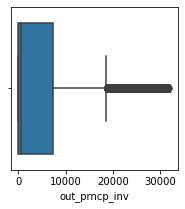

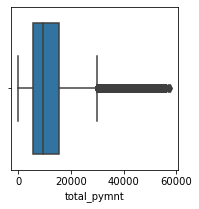

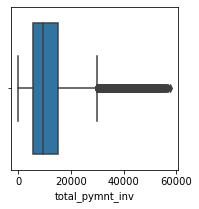

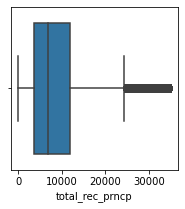

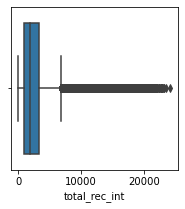

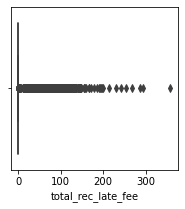

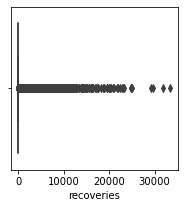

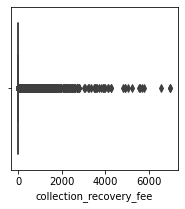

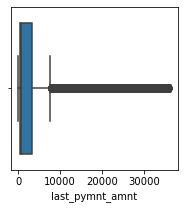

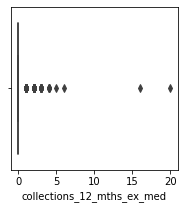

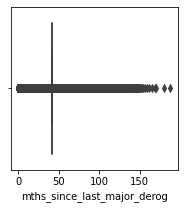

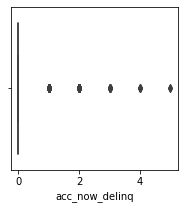

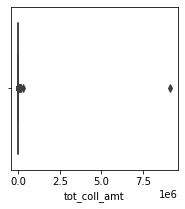

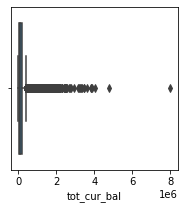

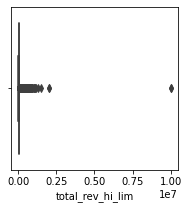

In [23]:
#box plot
for j in range (0,len(numeric)):
    num = numeric[j]
    plt.figure(figsize=(3,3))
    sns.boxplot(df[num])

**Data Insight** :

    1. Data memiliki banyak outlier

In [24]:
#Outlier dapat dihilangkan dengan IQR
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [25]:
df_clean = df.copy()
df_clean[numeric] = remove_outlier_IQR(df_clean[numeric])
variables = pd.DataFrame(columns=['Variable','Percent of Missing'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var,(df[var].count()/df_clean[var].count())]
    
# Join with the variables dataframe
print(variables.set_index('Variable').sort_values('Percent of Missing',ascending=False)[:100])

                             Percent of Missing
Variable                                       
mths_since_last_delinq                 1.837147
mths_since_last_major_derog            1.265738
delinq_2yrs                            1.217752
last_pymnt_amnt                        1.176897
mths_since_last_record                 1.152080
pub_rec                                1.151848
tot_coll_amt                           1.120231
inq_last_6mths                         1.081192
total_rev_hi_lim                       1.075592
total_rec_int                          1.071705
recoveries                             1.054318
out_prncp_inv                          1.051782
out_prncp                              1.051782
collection_recovery_fee                1.051574
revol_bal                              1.051112
tot_cur_bal                            1.046742
total_rec_prncp                        1.046505
annual_inc                             1.043044
total_pymnt_inv                        1

Nilai yang hilang dari masing-masing kolom data masih dibawah 20% sehingga masih bisa diimputasi dengan median

In [26]:
df = df.fillna(df.median())

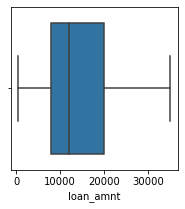

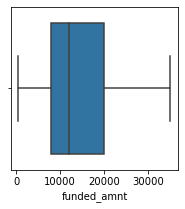

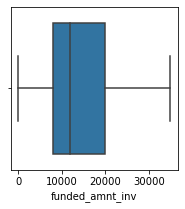

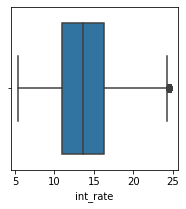

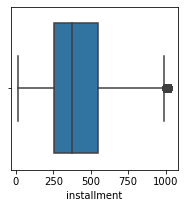

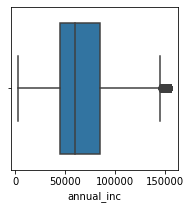

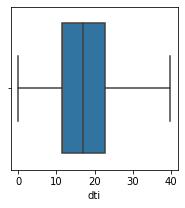

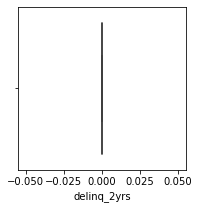

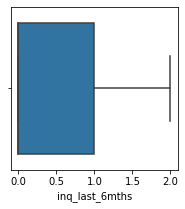

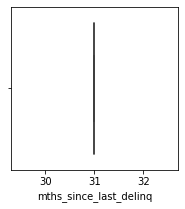

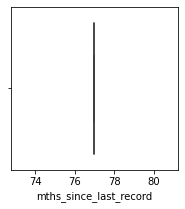

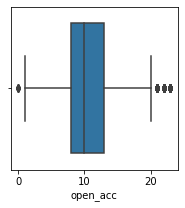

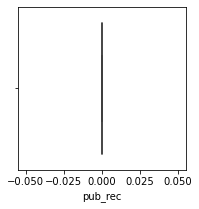

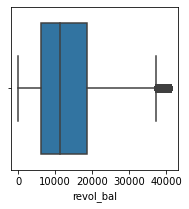

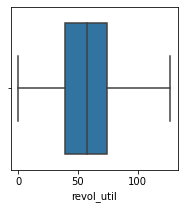

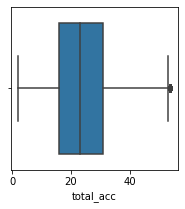

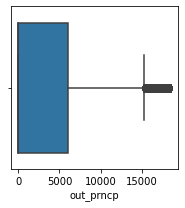

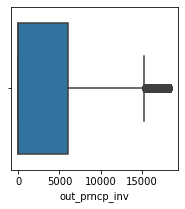

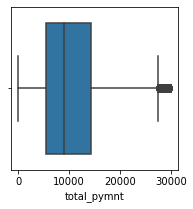

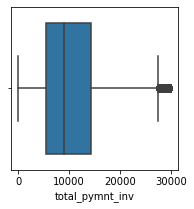

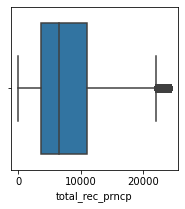

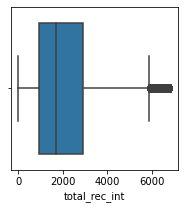

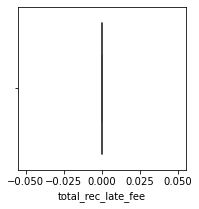

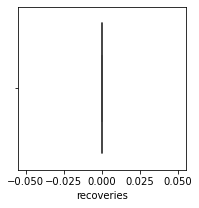

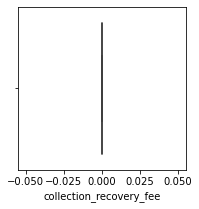

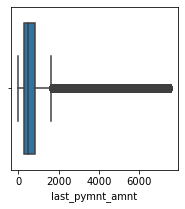

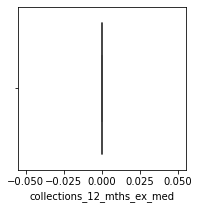

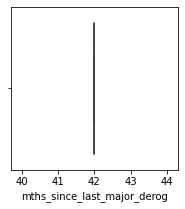

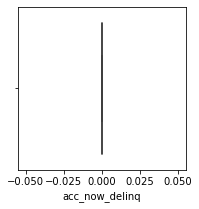

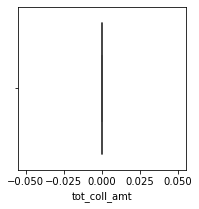

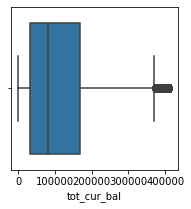

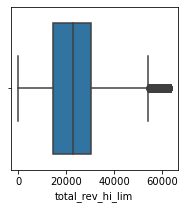

In [27]:
#box plot
for j in range (0,len(numeric)):
    num = numeric[j]
    plt.figure(figsize=(3,3))
    sns.boxplot(df_clean[num])

In [28]:
df_clean = df.copy()
df_clean[numeric] = remove_outlier_IQR(df_clean[numeric])
variables = pd.DataFrame(columns=['Variable','Unique of Values'])

for i, var in enumerate(df_clean.columns):
    variables.loc[i] = [var,(df_clean[var].nunique())]
    
# Join with the variables dataframe
print(variables.set_index('Variable').sort_values('Unique of Values',ascending=True))

                            Unique of Values
Variable                                    
tot_coll_amt                               1
acc_now_delinq                             1
total_rec_late_fee                         1
pub_rec                                    1
mths_since_last_major_derog                1
recoveries                                 1
mths_since_last_record                     1
mths_since_last_delinq                     1
collections_12_mths_ex_med                 1
delinq_2yrs                                1
collection_recovery_fee                    1
pymnt_plan                                 2
initial_list_status                        2
default_status                             2
term                                       2
verification_status                        3
inq_last_6mths                             3
home_ownership                             6
grade                                      7
emp_length                                12
purpose   

**Data Insight** : Outlier sudah berkurang akan tetapi hanya ada nilai yang 1 nilai yaitu delinq_2yrs,mth_since_last_delinq,mth_since_last_record,pub_rec,total_rec_late_fee,recoveries,collection_recovery_free,colection_12_mths_ex_med,mth_since_last_major derog,acc_noew_delinq,tot_coll_amnt. Sehingga dapat didrop

In [29]:
unique_column = variables.sort_values('Unique of Values',ascending=True)[:11]['Variable'].tolist()

In [30]:
df_clean.drop(unique_column,axis=1,inplace=True)

In [31]:
numeric = df_clean.describe().columns.tolist()

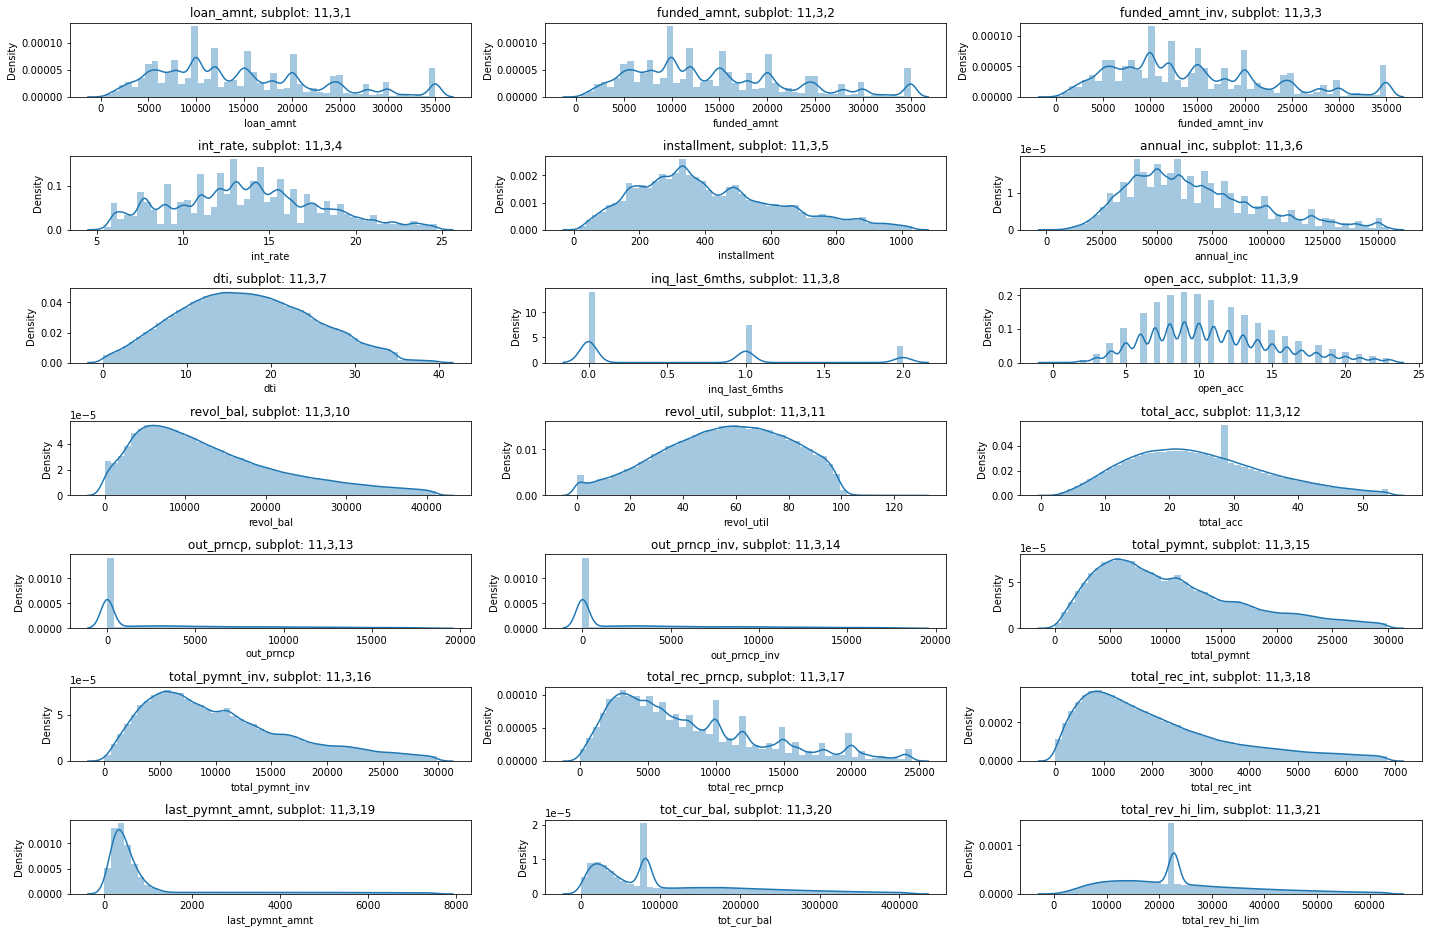

In [32]:

#  Categorical Data
a = 11  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,20))

for i in numeric:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df_clean[i])
    c = c + 1

plt.tight_layout()
plt.show()

**Data Insight**

Tidak terlalu banyak data yang memiliki skewness yang tinggi

In [33]:
df_clean['addr_state'].unique()
df_wilayah = pd.DataFrame({'addr_state':['CA','TX','PA','MN','AZ','WI','TN','MD','FL','NE','NJ','NV','OH','MI'
,'GA','VA','SC','NC','IN','IL','CO','UT','MO','NY','MA','PR','OR','LA'
,'WA','HI','QC','AB','ON','OK','MS','NM','AL','NS','CT','KY','RI','DC','SD','NH','AR','MT','WY','DE','IA','ID','ME'
],
                          'region':['W','SW','NE','MW','SW','MW','SW','Other','SE','MW','NE','W','MW','MW','SW',
                                   'SE','SE','SE','MW','MW','SW','W','MW','NE','NE','Other','W','SE',
                                    'W','W','Other','Other','Other','SW','SE','SW','SE','Other','NE','SE','NE','SE','MW','NE','SW','W','W','SE','MW','W','NE']})
df_wilayah
df_clean= df_clean.merge(df_wilayah,how='left')
df_clean = df_clean.dropna(subset=['region'])
df_clean.drop(['addr_state'],axis=1,inplace=True)

In [34]:
list_purpose = {'vacation':'tertiary','car':'tertiary','renewable_energy':'tertiary','home_improvement':'primary',
               'major_purchase':'primary','medical':'primary','moving':'primary','house':'primary','wedding':'primary',
               'educational':'primary'}
df_clean['purpose'] =df_clean['purpose'].replace(list_purpose)
df_clean['purpose'].value_counts()

debt_consolidation    267928
credit_card           101743
primary                47509
other                  22873
tertiary                8000
small_business          6769
Name: purpose, dtype: int64

In [35]:
df_clean['verification_status'] = df_clean['verification_status'].replace({'Source Verified':'Verified'})

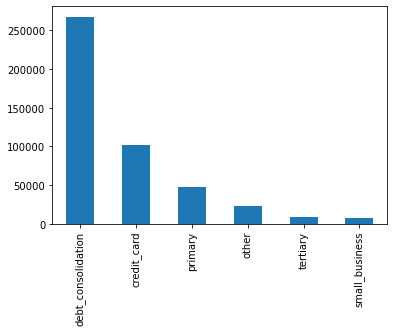

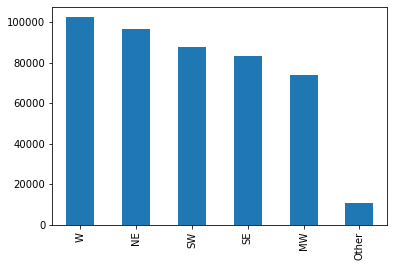

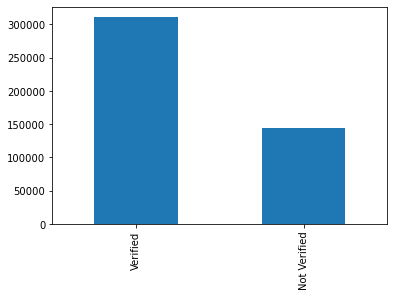

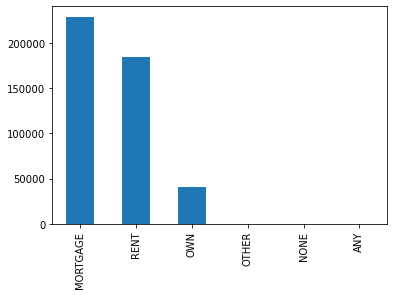

In [36]:
df_clean['purpose'].value_counts().plot(kind='bar')
plt.show()
df_clean['region'].value_counts().plot(kind='bar')
plt.show()
df_clean['verification_status'].value_counts().plot(kind='bar')
plt.show()
df_clean['home_ownership'].value_counts().plot(kind='bar')
plt.show()

**Business Insight**:

1. Banyak alasan orang berhutang untuk melakukan debt consolidation
2. Kreditur banyak yang memiliki jenis tempat tinggal yang masih melakukan cicilan rumah

<AxesSubplot:ylabel='funded_amnt'>

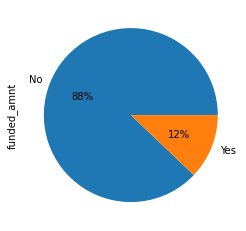

In [37]:
df.groupby('default_status')['funded_amnt'].sum().plot(kind='pie',autopct='%1.0f%%')

**Business Insight**:

12% kreditur mengalami kegagalan kredit

## Bivariat and Multivariat Analysis

### Data Numerikal

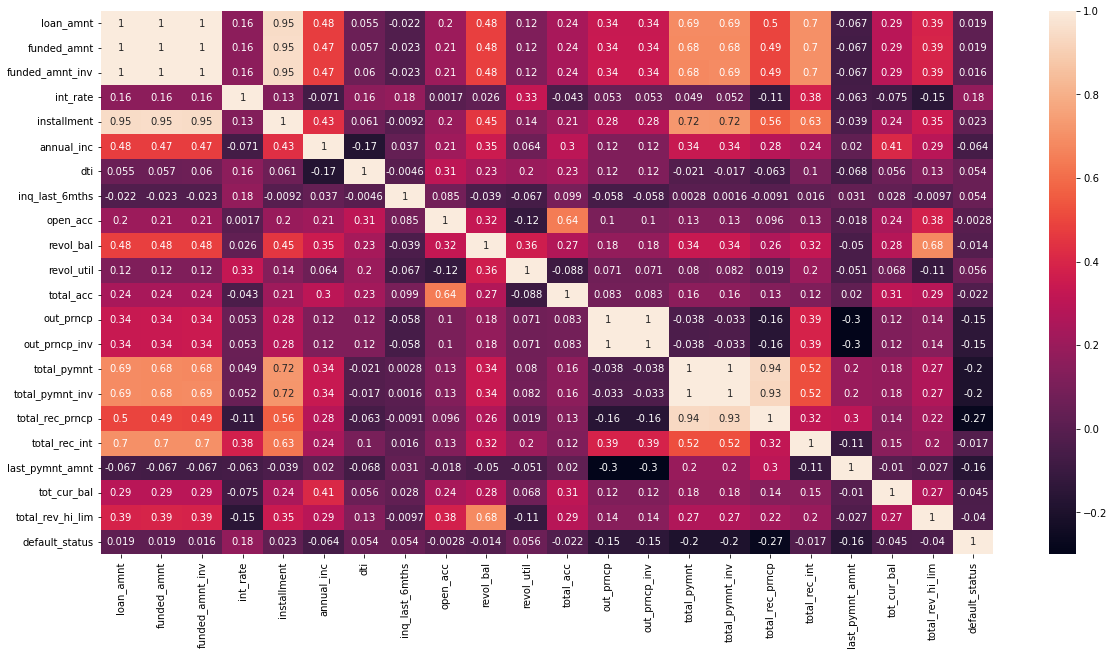

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
df_corr = df_clean[numeric].copy()
df_corr['default_status'] = df_clean['default_status']
df_corr['default_status'] = df_corr['default_status'].replace({'Yes':1,'No':0})
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

**Data Insight**:

funded_amnt, funded_amnt_inv,installment memiliki korelasi yang cukup tinggi dengan loan_amnt. total_pymnt_inv, total_rec_prncp memiliki korelasi dengan total_pymnt.Sehingga dapat didrop untuk mencegah multikolinearitas.

In [39]:
df_clean.drop(['funded_amnt','funded_amnt_inv','installment','total_pymnt_inv','total_rec_prncp'],axis=1,inplace=True)

In [40]:
numeric = df_clean.describe().columns.tolist()

### Data Kategorikal

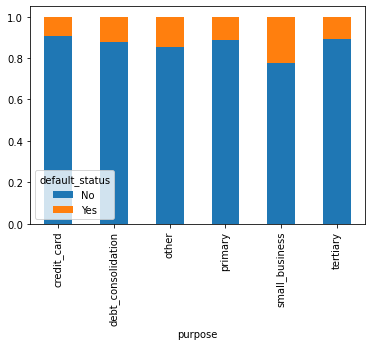

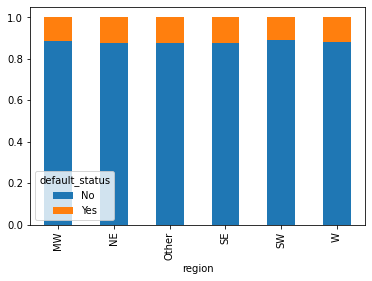

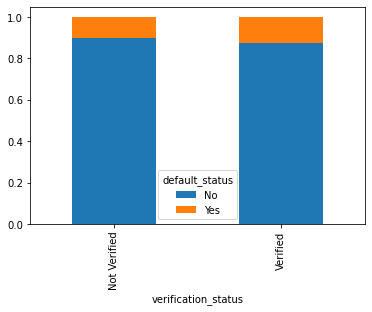

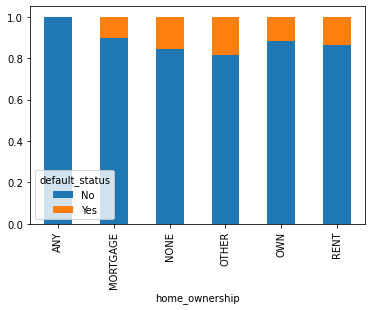

In [41]:
(df_clean.groupby(['purpose','default_status'])['default_status'].size()/df_clean.groupby(['purpose'])['default_status'].size()).unstack().plot(kind='bar', stacked=True)
(df_clean.groupby(['region','default_status'])['default_status'].size()/df_clean.groupby(['region'])['default_status'].size()).unstack().plot(kind='bar', stacked=True)
(df_clean.groupby(['verification_status','default_status'])['default_status'].size()/df_clean.groupby(['verification_status'])['default_status'].size()).unstack().plot(kind='bar', stacked=True)
(df_clean.groupby(['home_ownership','default_status'])['default_status'].size()/df_clean.groupby(['home_ownership'])['default_status'].size()).unstack().plot(kind='bar', stacked=True)
plt.show()

**Business Insight**
    
    1.20% kreditur yang memiliki tujuan untuk small business mengalami kegagalan kredit

In [42]:
df_clean['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [43]:
df_clean['grade'].unique()
list_nilai = {'A':6,'B':5,'C':4,'D':3,'E':2,'F':1,'G':0}
df_clean = df_clean.replace(list_nilai)
df_clean['grade'].unique()

array([5, 4, 6, 2, 1, 3, 0], dtype=int64)

In [44]:
#term to numeric
df_clean = df_clean.replace(' 36 months',36)
df_clean = df_clean.replace(' 60 months',60)
df_clean['term'].unique()

array([36, 60], dtype=int64)

In [45]:
df_clean['default_status'] = df_clean['default_status'].replace({'Yes':1,'No':0})

In [46]:
df_clean = df_clean.dropna()

# Data Preparation

## Encoding

In [47]:
ordinal = ['home_ownership']
nominal = ['region','purpose']
binary = ['verification_status']

In [48]:
Y = df_clean['default_status']
X = df_clean.drop('default_status',axis=1)
#nominal
def nominal_encode(df_clean, columns):
    df_clean = df_clean.copy()
    for column in columns:
        dummies = pd.get_dummies(df_clean[column])
        df_clean = pd.concat([df_clean, dummies], axis=1)
        df_clean.drop(column, axis=1, inplace=True)
    return df_clean
#ordinal
def ordinal_encode(df_clean, columns, orderings):
    df_clean = df_clean.copy()
    for column, ordering in zip(columns, orderings):
        df_clean[column] = df_clean[column].apply(lambda x: ordering.index(x) if str(x) != 'nan' else x)
    return df_clean
#binary
def binary_encode(df_clean, columns, positive_label):
    dbf_clean = df_clean.copy()
    for column in columns:
        df_clean[column] = df_clean[column].apply(lambda x: 1 if x == positive_label else 0)
    return df_clean

In [49]:
#nominal
X = nominal_encode(X,nominal)

In [50]:
#ordering
ordering = ['NONE','RENT','MORTGAGE','OWN','ANY','OTHER']
X = ordinal_encode(X,['home_ownership'] ,[ordering])

In [51]:
#binary
X = binary_encode(X, binary, 'Verified')

In [52]:
X = binary_encode(X, ['initial_list_status'], 'f')

In [53]:
X = binary_encode(X,['pymnt_plan'],'y')

In [54]:
X = X.dropna()
X.head(5)

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_rec_int,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,MW,NE,Other,SE,SW,W,credit_card,debt_consolidation,other,primary,small_business,tertiary
0,5000,36,10.65,5,10.0,1,24000.0,1,0,27.65,1.0,3.0,13648.0,83.7,9.0,1,0.00,0.00,5861.071414,861.07,171.62,81539.0,22800.0,0,0,0,0,1,0,1,0,0,0,0,0
2,2400,36,15.96,4,10.0,1,12252.0,0,0,8.72,2.0,2.0,2956.0,98.5,10.0,1,0.00,0.00,3003.653644,603.65,649.91,81539.0,22800.0,1,0,0,0,0,0,0,0,0,0,1,0
3,10000,36,13.49,4,10.0,1,49200.0,1,0,20.00,1.0,10.0,5598.0,21.0,37.0,1,0.00,0.00,12226.302210,2209.33,357.48,81539.0,22800.0,0,0,0,0,0,1,0,0,1,0,0,0
4,3000,60,12.69,5,1.0,1,80000.0,1,0,17.94,0.0,15.0,27783.0,53.9,38.0,1,766.90,766.90,3242.170000,1009.07,67.79,81539.0,22800.0,0,0,0,0,0,1,0,0,1,0,0,0
6,7000,60,15.96,4,8.0,1,47004.0,0,0,23.51,1.0,7.0,17726.0,85.6,11.0,1,1889.15,1889.15,8136.840000,3025.99,170.08,81539.0,22800.0,0,0,0,1,0,0,0,1,0,0,0,0


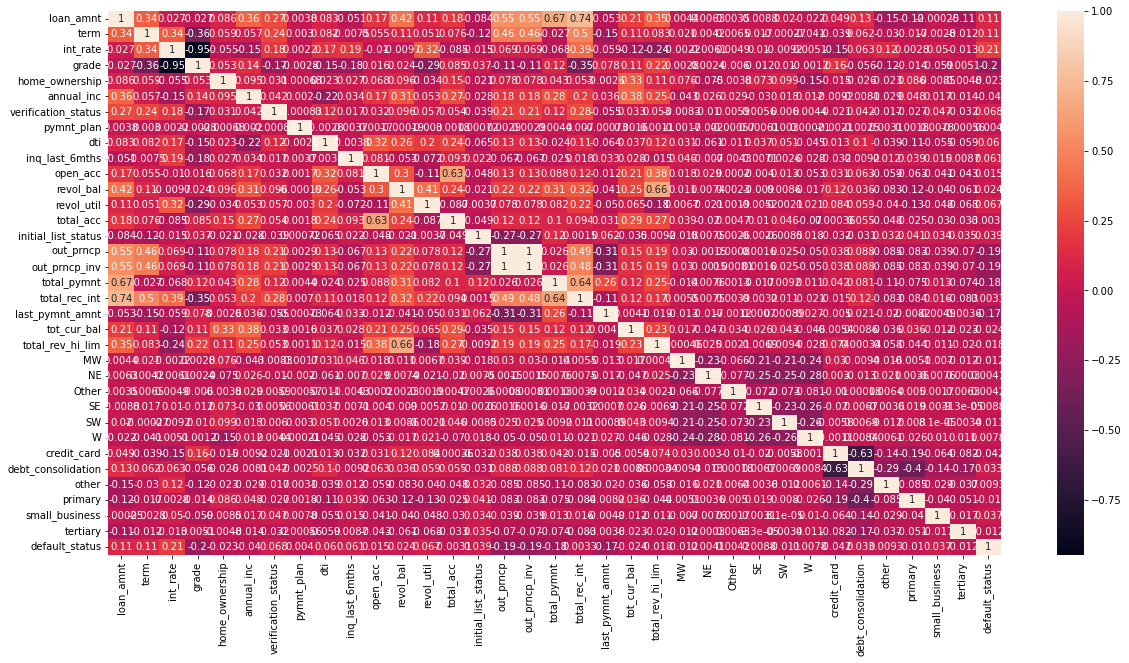

In [55]:
df_corr = X.copy()
df_corr['default_status'] = df_clean['default_status']
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

**Data Insight**

int_rate memiliki korelasi yang tinggi dengan grade sehingga dapat didrop

In [56]:
X.drop(['emp_length'],axis=1,inplace=True)

In [57]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'dti',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_rec_int', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim',
       'MW', 'NE', 'Other', 'SE', 'SW', 'W', 'credit_card',
       'debt_consolidation', 'other', 'primary', 'small_business', 'tertiary'],
      dtype='object')

In [58]:
X_new = X.copy()
X_new = X_new.iloc[:, 0:4]
X_new.head(2)

,loan_amnt,term,int_rate,grade
0,5000,36,10.65,5
2,2400,36,15.96,4


## Splitting Data

In [59]:
#Split Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3)

Data cenderung memiliki banyak outlier sehingga scaller yang dipilih adalah min max

In [60]:
from sklearn.preprocessing import MinMaxScaler #Robust Scaller = outlier, min max = lebih normal
X_train_col = X_train.copy()
X_test_col = X_test.copy()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

### Scoring Model
Confusion Matriks:

TP : Prediksi(benar) Test(benar)

TN : Prediksi(salah) Test (salah)

FP : Prediksi (benar) Test (salah)

FN : Prediksi (salah) Test (benar)


Accuracy : Jumlah proporsi prediksi yang tepat (TP+TN) dengan keseluruhan 

Prediksi (TP+FP+TN+FP)

Presisi : Jumlah proporsi prediksi yang benar (TP) dengan keseluruhan hasil yang benar (TP+FN)

Recall  : Jumlah proporsi hasil yang benar (TP) dengan keseluruhan prediksi yang positif (TP+FP)

Pada model ini karena digunakan untuk mendeteksi fraud yang terjadi maka akan menggunakan scoring utama yaitu akurasi. Jika model dapat memprediksi **secara tepat** maka dapat **mencegah terjadinya default dan memaksimalkan jumlah kredit yang ada**. Jika model memprediksi **secara keliru** dapat **merugikan perusahaan**. **Presisi** dapat diterapkan karena model ini bertujuan untuk mencegah kekeliruan prediksi kredit

## Logistic Regression

In [61]:
#REGRESSION
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_proba = model.predict_proba(X_test)[::,1]
y_pred_proba_train = model.predict_proba(X_train)[::,1]
probas = model.predict_proba(X_test)

auc score dan presisi dari model ini adalah 98.61846649781258 % dan 94.30900588285253 %
overfitting dari model, auc: -0.02662410649846292 %  dan presisi: 0.11025914362408074 %


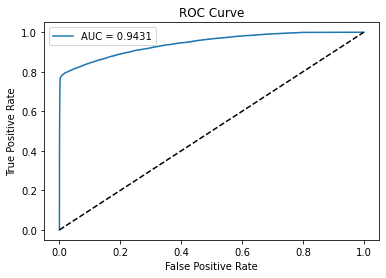

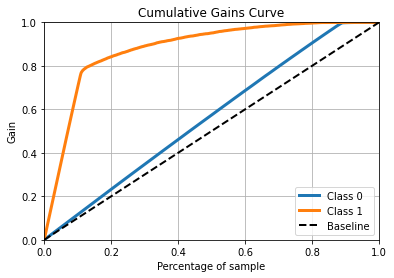

Text(0.5, 1.0, 'Kolmogorov-Smirnov = 0.7760')

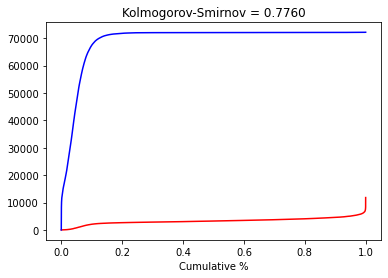

In [62]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
import scikitplot as skplt
from sklearn.metrics import precision_score

precision_lr = precision_score(y_test,y_pred_test)
precision_lr_train = precision_score(y_train,y_pred_train)
auc_lr = roc_auc_score(y_test,  y_pred_proba)
auc_lr_train = roc_auc_score(y_train,  y_pred_proba_train)
overfitting_lr_auc = auc_lr - auc_lr_train
overfitting_lr_prec = precision_lr-precision_lr_train
print('auc score dan presisi dari model ini adalah',precision_lr*100,'%','dan',auc_lr*100,'%')
print('overfitting dari model, auc:',overfitting_lr_auc*100,'%',' dan presisi:',overfitting_lr_prec*100,'%')
#ROC Curve
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#dicek overfitting atau underfitting
#create ROC curve
plt.plot(fpr,tpr, label='AUC = %0.4f'%auc_lr)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
#Gain Chart
skplt.metrics.plot_cumulative_gain(y_test,y_probas =probas)
plt.show()
#KS
X_test_col['y_pred_proba'] = y_pred_proba
X_test_col['y_test'] = y_test
X_test_col = X_test_col.sort_values('y_pred_proba')
X_test_col = X_test_col.reset_index()
X_test_col['Cum Pop'] = X_test_col.index+1
X_test_col['Cum Bad'] = X_test_col['y_test'].cumsum()
X_test_col['Cum Good'] = X_test_col['Cum Pop'] - X_test_col['Cum Bad']
X_test_col['Cum Perc Pop'] = X_test_col['Cum Pop']/X_test_col.shape[0]
X_test_col['Cum Perc Bad'] = X_test_col['Cum Bad']/X_test_col['y_test'].sum()
X_test_col['Cum Perc Good'] = X_test_col['Cum Good']/(X_test_col.shape[0]-X_test_col['y_test'].sum())

KS_lr = max(X_test_col['Cum Perc Good']-X_test_col['Cum Perc Bad'])

plt.plot(X_test_col['y_pred_proba'],X_test_col['Cum Bad'],color='r')
plt.plot(X_test_col['y_pred_proba'],X_test_col['Cum Good'],color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.xlabel('Cumulative %')
plt.title('Kolmogorov-Smirnov = %0.4f'%KS_lr)

## Data Imbalance and Split

In [63]:
#Split Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3)

## Scaller

Data cenderung memiliki banyak outlier sehingga scaller yang dipilih adalah min max

In [64]:
from sklearn.preprocessing import MinMaxScaler
X_train_col = X_train.copy()
X_test_col = X_test.copy()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## RandomForestClassifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy',n_estimators=800,n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_proba = model.predict_proba(X_test)[::,1]
y_pred_proba_train = model.predict_proba(X_train)[::,1]
probas = model.predict_proba(X_test)

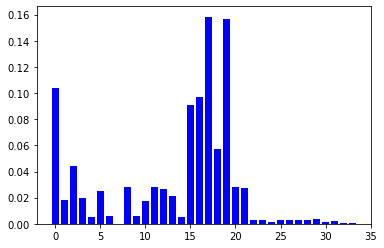

total_pymnt            0.158427
last_pymnt_amnt        0.156930
loan_amnt              0.104243
out_prncp_inv          0.097082
out_prncp              0.091129
total_rec_int          0.057029
int_rate               0.043915
revol_bal              0.028482
tot_cur_bal            0.028009
dti                    0.027897
total_rev_hi_lim       0.027538
revol_util             0.026995
annual_inc             0.024899
total_acc              0.020963
grade                  0.019432
term                   0.018498
open_acc               0.017446
inq_last_6mths         0.006099
verification_status    0.005753
home_ownership         0.005436
initial_list_status    0.005092
debt_consolidation     0.003905
W                      0.003237
NE                     0.003214
SE                     0.003023
SW                     0.002950
credit_card            0.002716
MW                     0.002706
primary                0.002292
other                  0.001663
Other                  0.001147
tertiary

In [66]:
feature=model.feature_importances_
plt.bar(range(X_train.shape[1]),feature,color='blue',align='center')
plt.show()
feature_scores = pd.Series(model.feature_importances_, index=X_train_col.columns).sort_values(ascending=False)
print(feature_scores)

auc score dan presisi dari model ini adalah 99.56175758274709 % dan 94.48186682813844 %
overfitting dari model, auc: -5.518133171861561 %  dan presisi: -0.4382424172529098 %


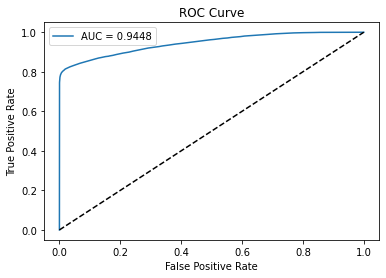

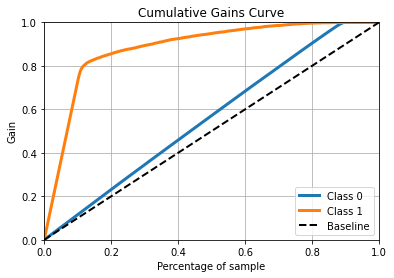

Text(0.5, 1.0, 'Kolmogorov-Smirnov = 0.7950')

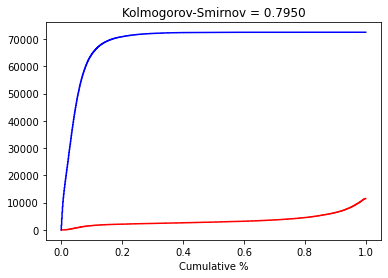

In [67]:
precision_rf = precision_score(y_test,y_pred_test)
precision_rf_train = precision_score(y_train,y_pred_train)
auc_rf = roc_auc_score(y_test,  y_pred_proba)
auc_rf_train = roc_auc_score(y_train,  y_pred_proba_train)
overfitting_rf_auc = auc_rf - auc_rf_train
overfitting_rf_prec = precision_rf-precision_rf_train
print('auc score dan presisi dari model ini adalah',precision_rf*100,'%','dan',auc_rf*100,'%')
print('overfitting dari model, auc:',overfitting_rf_auc*100,'%',' dan presisi:',overfitting_rf_prec*100,'%')
#ROC Curve
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#dicek overfitting atau underfitting
#create ROC curve
plt.plot(fpr,tpr, label='AUC = %0.4f'%auc_rf)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
#Gain Chart
skplt.metrics.plot_cumulative_gain(y_test,y_probas =probas)
plt.show()
#KS
X_test_col['y_pred_proba_rf'] = y_pred_proba
X_test_col['y_test_rf'] = y_test
X_test_col = X_test_col.sort_values('y_pred_proba_rf')
X_test_col = X_test_col.reset_index()
X_test_col['Cum Pop_rf'] = X_test_col.index+1
X_test_col['Cum Bad_rf'] = X_test_col['y_test_rf'].cumsum()
X_test_col['Cum Good_rf'] = X_test_col['Cum Pop_rf'] - X_test_col['Cum Bad_rf']
X_test_col['Cum Perc Pop_rf'] = X_test_col['Cum Pop_rf']/X_test_col.shape[0]
X_test_col['Cum Perc Bad_rf'] = X_test_col['Cum Bad_rf']/X_test_col['y_test_rf'].sum()
X_test_col['Cum Perc Good_rf'] = X_test_col['Cum Good_rf']/(X_test_col.shape[0]-X_test_col['y_test_rf'].sum())

KS_rf = max(X_test_col['Cum Perc Good_rf']-X_test_col['Cum Perc Bad_rf'])

plt.plot(X_test_col['y_pred_proba_rf'],X_test_col['Cum Bad_rf'],color='r')
plt.plot(X_test_col['y_pred_proba_rf'],X_test_col['Cum Good_rf'],color='b')
plt.xlabel('Estimated Probability for Being Ba d')
plt.xlabel('Cumulative %')
plt.title('Kolmogorov-Smirnov = %0.4f'%KS_rf)

In [68]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
accuracy_rf_test = accuracy_score(y_test,y_pred_test)
accuracy_rf_train = accuracy_score(y_train,y_pred_train)
precision_rf_test = precision_score(y_test,y_pred_test)
precision_rf_train = precision_score(y_train,y_pred_train)
overfitting_acc_rf = accuracy_rf_train-accuracy_rf_test
overfitting_pre_rf = precision_rf_train-precision_rf_test
print('akurasi dari model ini adalah',accuracy_rf_test)
print('presisi dari model ini adalah',precision_rf_train)
print('overfitting dari model, akurasi:',overfitting_acc_rf,' dan presisi:',overfitting_pre_rf)

akurasi dari model ini adalah 0.9653994070510913
presisi dari model ini adalah 1.0
overfitting dari model, akurasi: 0.034600592948908715  dan presisi: 0.004382424172529098


## XGBoost

In [69]:
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3)
X_train_col = X_train.copy()
X_test_col = X_test.copy()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_proba = model.predict_proba(X_test)[::,1]
y_pred_proba_train = model.predict_proba(X_train)[::,1]
probas = model.predict_proba(X_test)

auc score dan presisi dari model ini adalah 98.52972286862703 % dan 95.88528937535324 %
overfitting dari model, auc: -2.3415385868830074 %  dan presisi: -0.9348257905135715 %


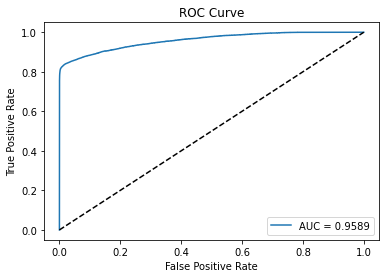

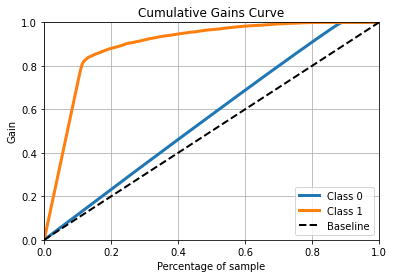

Text(0.5, 1.0, 'Kolmogorov-Smirnov = 0.8205')

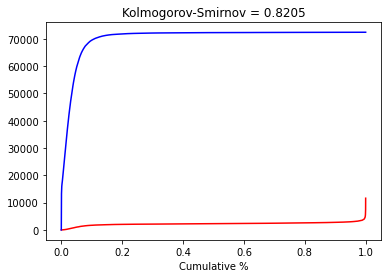

In [71]:
precision_xgb = precision_score(y_test,y_pred_test)
precision_xgb_train = precision_score(y_train,y_pred_train)
auc_xgb = roc_auc_score(y_test,  y_pred_proba)
auc_xgb_train = roc_auc_score(y_train,  y_pred_proba_train)
overfitting_xgb_auc = auc_xgb - auc_xgb_train
overfitting_xgb_prec = precision_xgb-precision_xgb_train
print('auc score dan presisi dari model ini adalah',precision_xgb*100,'%','dan',auc_xgb*100,'%')
print('overfitting dari model, auc:',overfitting_xgb_auc*100,'%',' dan presisi:',overfitting_xgb_prec*100,'%')
#ROC Curve
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#dicek overfitting atau underfitting
#create ROC curve
plt.plot(fpr,tpr, label='AUC = %0.4f'%auc_xgb)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
#Gain Chart
skplt.metrics.plot_cumulative_gain(y_test,y_probas =probas)
plt.show()
#KS
X_test_col['y_pred_proba'] = y_pred_proba
X_test_col['y_test'] = y_test
X_test_col = X_test_col.sort_values('y_pred_proba')
X_test_col = X_test_col.reset_index()
X_test_col['Cum Pop'] = X_test_col.index+1
X_test_col['Cum Bad'] = X_test_col['y_test'].cumsum()
X_test_col['Cum Good'] = X_test_col['Cum Pop'] - X_test_col['Cum Bad']
X_test_col['Cum Perc Pop'] = X_test_col['Cum Pop']/X_test_col.shape[0]
X_test_col['Cum Perc Bad'] = X_test_col['Cum Bad']/X_test_col['y_test'].sum()
X_test_col['Cum Perc Good'] = X_test_col['Cum Good']/(X_test_col.shape[0]-X_test_col['y_test'].sum())

KS_xgb = max(X_test_col['Cum Perc Good']-X_test_col['Cum Perc Bad'])

plt.plot(X_test_col['y_pred_proba'],X_test_col['Cum Bad'],color='r')
plt.plot(X_test_col['y_pred_proba'],X_test_col['Cum Good'],color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.xlabel('Cumulative %')
plt.title('Kolmogorov-Smirnov = %0.4f'%KS_xgb)

## Light GBM

In [72]:
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3)
X_train_col = X_train.copy()
X_test_col = X_test.copy()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_proba = model.predict_proba(X_test)[::,1]
y_pred_proba_train = model.predict_proba(X_train)[::,1]
probas = model.predict_proba(X_test)

auc score dan presisi dari model ini adalah 99.2318511305853 % dan 96.03809917342518 %
overfitting dari model, auc: -0.9028869885900015 %  dan presisi: -0.026424589390894315 %


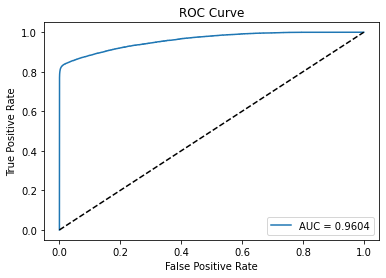

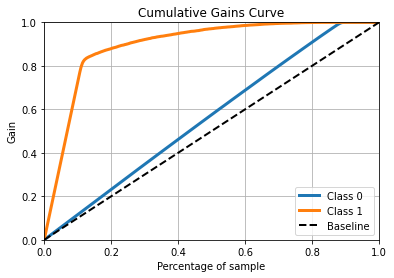

Text(0.5, 1.0, 'Kolmogorov-Smirnov = 0.8225')

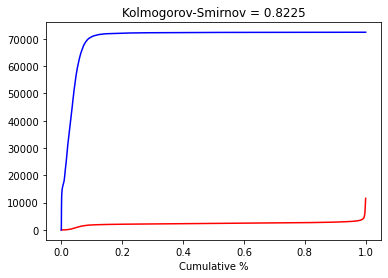

In [74]:
precision_lgb = precision_score(y_test,y_pred_test)
precision_lgb_train = precision_score(y_train,y_pred_train)
auc_lgb = roc_auc_score(y_test,  y_pred_proba)
auc_lgb_train = roc_auc_score(y_train,  y_pred_proba_train)
overfitting_lgb_auc = auc_lgb - auc_lgb_train
overfitting_lgb_prec = precision_lgb-precision_lgb_train
print('auc score dan presisi dari model ini adalah',precision_lgb*100,'%','dan',auc_lgb*100,'%')
print('overfitting dari model, auc:',overfitting_lgb_auc*100,'%',' dan presisi:',overfitting_lgb_prec*100,'%')
#ROC Curve
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#dicek overfitting atau underfitting
#create ROC curve
plt.plot(fpr,tpr, label='AUC = %0.4f'%auc_lgb)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
#Gain Chart
skplt.metrics.plot_cumulative_gain(y_test,y_probas =probas)
plt.show()
#KS
X_test_col['y_pred_proba'] = y_pred_proba
X_test_col['y_test'] = y_test
X_test_col = X_test_col.sort_values('y_pred_proba')
X_test_col = X_test_col.reset_index()
X_test_col['Cum Pop'] = X_test_col.index+1
X_test_col['Cum Bad'] = X_test_col['y_test'].cumsum()
X_test_col['Cum Good'] = X_test_col['Cum Pop'] - X_test_col['Cum Bad']
X_test_col['Cum Perc Pop'] = X_test_col['Cum Pop']/X_test_col.shape[0]
X_test_col['Cum Perc Bad'] = X_test_col['Cum Bad']/X_test_col['y_test'].sum()
X_test_col['Cum Perc Good'] = X_test_col['Cum Good']/(X_test_col.shape[0]-X_test_col['y_test'].sum())

KS_lgb = max(X_test_col['Cum Perc Good']-X_test_col['Cum Perc Bad'])

plt.plot(X_test_col['y_pred_proba'],X_test_col['Cum Bad'],color='r')
plt.plot(X_test_col['y_pred_proba'],X_test_col['Cum Good'],color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.xlabel('Cumulative %')
plt.title('Kolmogorov-Smirnov = %0.4f'%KS_lgb)

In [75]:
kesimpulan = pd.DataFrame({'Model':['Linear Regression','Random Forest','XGBoost','Light GBM'],
                          'Presisi':[precision_lr,precision_rf,precision_xgb,precision_lgb],
                          'AUC':[auc_lr,auc_rf,auc_xgb,auc_lgb],
                          'KS':[KS_lr,KS_rf,KS_xgb,KS_lgb],
                          'Overfitting':[overfitting_lr_auc,overfitting_rf_auc,overfitting_xgb_auc,overfitting_lgb_auc]})
kesimpulan

,Model,Presisi,AUC,KS,Overfitting
0,Linear Regression,0.986185,0.943090,0.775977,-0.000266
1,Random Forest,0.995618,0.944819,0.795024,-0.055181
2,XGBoost,0.985297,0.958853,0.820485,-0.023415
3,Light GBM,0.992319,0.960381,0.822457,-0.009029


**Kesimpulan**

Pada modeling kali ini akan menggunakan logaritma linear regression karena memiliki AUC dan presisi yang tinggi tanpa adanya indikasi overfitting. (dicoba variasi SMOTE). Cek score pada crossvalidation untuk mengecek overfitting

# Scorecard

In [77]:
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3)
X_train_col = X_train.copy()
X_test_col = X_test.copy()

In [78]:
from optbinning import Scorecard, BinningProcess

In [79]:
df_clean.drop(['emp_length', 'purpose', 'region'],axis=1,inplace=True)

In [80]:
list_features = df_clean.drop(columns=['default_status']).columns.values
list_categorical = df_clean.select_dtypes(include=['object', 'category']).columns.values
selection_criteria = {"iv": {"min": 0.005, 'max':0.5, "strategy": "highest"}}
binning_process = BinningProcess(
    categorical_variables=list_categorical,
    variable_names=list_features,
    selection_criteria=selection_criteria,)

In [81]:
scaling_method = "min_max"
scaling_method_data = {"min": 0, "max": 1000}
logreg = LogisticRegression()

# Instatiate and fit Scorecard
scorecard = Scorecard(
    binning_process=binning_process,
    estimator=logreg,
    scaling_method=scaling_method,
    scaling_method_params=scaling_method_data,
    intercept_based=False,
    reverse_scorecard=True,
)

scorecard.fit(X_test,y_test)

Scorecard(binning_process=BinningProcess(categorical_variables=array(['home_ownership', 'verification_status', 'pymnt_plan',
       'initial_list_status'], dtype=object),
                                         selection_criteria={'iv': {'max': 0.5,
                                                                    'min': 0.005,
                                                                    'strategy': 'highest'}},
                                         variable_names=array(['loan_amnt', 'term', 'int_rate', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'dti',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_rec_int', 'last_pymnt_amnt', 'tot_cur_bal',
       'total_rev_hi_lim'], dtype=object)),
          estimator=LogisticRegression(), reverse_scorecard=True,
          scaling_method='min_max',
          scaling_method_params={'max': 1000, 'min': 0})

In [82]:
scorecard_summary = scorecard.table(style="detailed").round(3)
scorecard_summary.to_csv('scorecard_table_detailed_1.csv', index=False)

In [85]:
df_score_card = pd.read_csv('scorecard_table_detailed_1.csv')
df_score_card

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,loan_amnt,0,"(-inf, 7062.50)",24478,0.291,22015,2463,0.101,0.351,0.032,0.004,-4.683,-30.005
1,loan_amnt,1,"[7062.50, 9112.50)",10680,0.127,9395,1285,0.120,0.150,0.003,0.000,-4.683,4.808
2,loan_amnt,2,"[9112.50, 10012.50)",9733,0.116,8465,1268,0.130,0.059,0.000,0.000,-4.683,20.561
3,loan_amnt,3,"[10012.50, 12012.50)",9693,0.115,8322,1371,0.141,-0.036,0.000,0.000,-4.683,37.045
4,loan_amnt,4,"[12012.50, 15012.50)",10494,0.125,8979,1515,0.144,-0.060,0.000,0.000,-4.683,41.184
5,loan_amnt,5,"[15012.50, 21087.50)",13897,0.165,11592,2305,0.166,-0.224,0.009,0.001,-4.683,69.641
6,loan_amnt,6,"[21087.50, inf)",5012,0.060,3702,1310,0.261,-0.801,0.050,0.006,-4.683,169.508
7,loan_amnt,7,Special,0,0.000,0,0,0.000,0.000,0.000,0.000,-4.683,30.810
8,loan_amnt,8,Missing,0,0.000,0,0,0.000,0.000,0.000,0.000,-4.683,30.810
9,term,0,"(-inf, 48.00)",68407,0.814,60254,8153,0.119,0.161,0.020,0.002,0.397,33.173
